<a href="https://colab.research.google.com/github/SzuHannah/blending-stochastic/blob/main/Advopt_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install gurobipy

     |████████████████████████████████| 11.5 MB 3.6 MB/s 


In [ ]:
import numpy as np
import gurobipy as grb
import scipy.stats as stat
from tqdm.notebook import trange
import matplotlib.pyplot as plt
plt.style.use('default')

### one quality measure, two raw materials, and one product

### moreau envelope obj

In [ ]:
#N_seq = [10, 50, 100, 400]; # number of samples
N_seq = [10, 50, 100, 500, 1000, 10000, 20000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
# feasible region of Qx-b
lb = 0
ub = 10.21
seq = np.zeros(len(N_seq));
me_seq = np.zeros(len(N_seq)); 
ci_up_seq = np.zeros(len(N_seq));
ci_low_seq = np.zeros(len(N_seq));
ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    obj = np.zeros(M);
    #UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N) ;
        e2 = np.random.uniform(14.540,15.656, N)
        exp = 0; # each replication
        mu = 0.001 # control step size

        # model
        model = grb.Model('SAA_mor', env = e);
        model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))

        model.update()

        # Define Objective & constraints
        for k in range(N):
          t = model.addVar()
          model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]-5.75)

          ##Projection of Qx-b to [0,ub]: min{max{Qx-b,lb},ub}
          #max (Qx,lb+b) = u
          u = model.addVar()
          model.addGenConstrMax(u,[t],lb)


          #min (u, ub) = v
          v = model.addVar()
          model.addGenConstrMin(v,[u],ub)

          ## minimize distance of current Qx-b to projection
          d = model.addVar()
          model.addConstr(d == ((t-v)**2)/2)

          model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] <= 100)
          model.addConstr(x[1,k] + x[2,k] >= 0.3)

        ds = model.getVars()
        model.setObjective(grb.quicksum(ds)*1.0/N, grb.GRB.MINIMIZE)

        model.setParam('NonConvex', 2)
        model.optimize()

        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = model.getAttr('x', x).values()[i];
        exp = model.objVal;
        obj[rep_m] = exp;
        print(xval)

    seq[s] = sum(obj)*1.0/M;
    print("Moreau Bound = ", seq[s]);
    var = sum([np.square(obj[k]-seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Moreau Bound Variance = ", var);
    # marginal error
    me = (stat.norm.ppf(1-alpha)*np.power(var,1/2))*1.0/(np.power(M,1)/2);
    ci[s] = me
    ci_up_seq[s]  = seq[s] + me;
    ci_low_seq[s] = seq[s] - me;
    print("CI of Moreau Bound = [", ci_low_seq[s]," , ", ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 6.135133570675138e-05}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0028110818630202594}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.001270428733278317}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0006224614254720651}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0013094488184478559}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0002969115812047063}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0009886226197997061}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.001918

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.339765361723658, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3395302753554716, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0021644569793356494}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.001559362655317642}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 7.523377500059227e-05}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33913914045485594, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3386577900416357, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0024270052806844022}
A

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0012723156037280914}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002895975922335481}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0018220185839233904}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0007729511023778501}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0027079285521578456}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002685047227558135}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00016989972849990043}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.339926079806923

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002366752204768674}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0001757981481477211}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 1.0612789833857725e-05}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00022206265658575308}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0024260687442017037}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0013220216603606616}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0014328252439176348}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3397889067935

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0011114496757994585}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0030985812308840233}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0005512594507292023}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0017942044545911084}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0022127528682346354}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0001571697548178319}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0027346814965807376}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00272

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002942676210384798}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3393663675155505, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3387566914989632, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3389857835423842, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33972173179525667, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0015567460121288512}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0015056462869441622}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33864654410681183, 2: 0.0}
Aca

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002868922314642419}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.000906237808278143}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.000339742698456047}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0009844314008055077}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002614814920515296}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0024146474777110294}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3389969679129201, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3396574839425707, 2: 0

#### CI plot

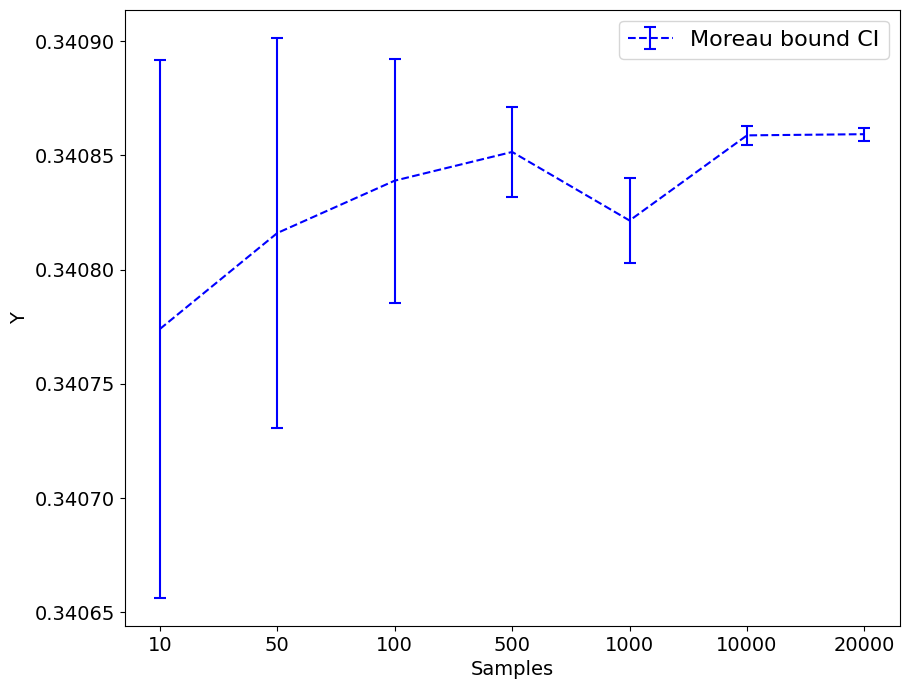

In [ ]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
# ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], UB_seq, yerr = UB_ci, color="r", **linestyle)
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], seq, yerr = ci, color="b", **linestyle)
#ax.legend(['Upper bound CI','Lower bound CI'], fontsize  = 16)
ax.legend(['Moreau bound CI'], fontsize  = 16)
plt.show()

### cVAR obj

In [ ]:
#N_seq = [10, 50, 100, 400]; # number of samples
N_seq = [10, 50, 100, 500, 1000, 10000, 20000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.001;

cv_seq = np.zeros(len(N_seq));
cv_me_seq = np.zeros(len(N_seq)); 
cv_ci_up_seq = np.zeros(len(N_seq));
cv_ci_low_seq = np.zeros(len(N_seq));
cv_ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    cv_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N) ;
        e2 = np.random.uniform(14.540,15.656, N)
        cv_exp = 0; # each replication
        
        # model
        cv_model = grb.Model('SAA_cv', env = e);
        cv_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = cv_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = cv_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))

        cv_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = cv_model.addVar()
          cv_model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]-5.75-eps)

          #max
          u = cv_model.addVar()
          cv_model.addGenConstrMax(u,[t],0)
          ue = cv_model.addVar()
          cv_model.addConstr(ue == -u/eps)

          cv_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] <= 100)
          cv_model.addConstr(x[1,k] + x[2,k] >= 0.3)
        ues = cv_model.getVars()
        cv_model.setObjective(grb.quicksum(ues)*1.0/N, grb.GRB.MINIMIZE)

        cv_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = cv_model.getAttr('x', x).values()[i];
        cv_exp = cv_model.objVal;
        cv_obj[rep_m] = cv_exp;
        print(xval)

    cv_seq[s] = sum(cv_obj)*1.0/M;
    print("cVAR Bound = ", cv_seq[s]);
    cv_var = sum([np.square(cv_obj[k]-cv_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("cVAR Bound Variance = ", cv_var);
    # marginal error
    cv_me = (stat.norm.ppf(1-alpha)*np.power(cv_var,1/2))*1.0/(np.power(M,1)/2);
    cv_ci[s] = cv_me
    cv_ci_up_seq[s]  = cv_seq[s] + cv_me;
    cv_ci_low_seq[s] = cv_seq[s] - cv_me;
    print("CI of cVAR Bound = [", cv_ci_low_seq[s]," , ", cv_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0006629851226812589}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3397703375273568, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0028356915598511945}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002806638409813489}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002003153010657621}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0010317542575174476}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0024302869086789136}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00011588705

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0009854425459541183}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0025043196040110405}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0022391535656426376}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.003315036857109377}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0009772610453324115}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0017886588546689453}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33948464874744805, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002236647

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 6.244252153431162e-05}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0014479517614333637}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0025654560121415315}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0024276298919923556}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002944496475701497}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0012706912023911499}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3389920188018671, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0012903144

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.003234521073297303}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3391338067212023, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3388062064552176, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3390335875034377, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0025985530676166935}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0031573748795981627}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.339799346148041, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0028639706811105503}
Ac

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0017679454393248473}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.003105878778928317}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0024426533398282935}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.00012764597739856054}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0033250051796566704}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0014718301912108323}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.003218392119424207}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002236

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0003103161392514209}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0009731124927014334}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3390575697411498, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3396299953339841, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0005310186108510306}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.003094583731227174}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3398553652505062, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0010438272091986}


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0032902149714260087}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0031537132713874705}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.002202120824089382}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33965407200370107, 2: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0027939748116611596}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0011900323840989269}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.001987102258652229}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0026479399

#### CI plot

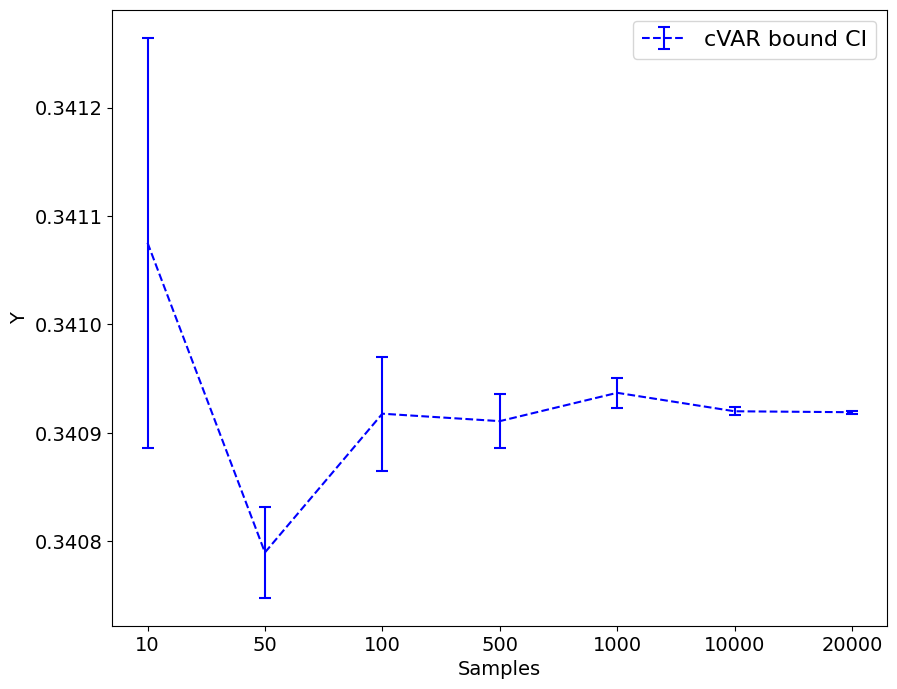

In [ ]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
# ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], UB_seq, yerr = UB_ci, color="r", **linestyle)
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], cv_seq, yerr = cv_ci, color="b", **linestyle)
ax.legend(['cVAR bound CI'], fontsize  = 16)
plt.show()

#### plot CI from moreau and cVAR together

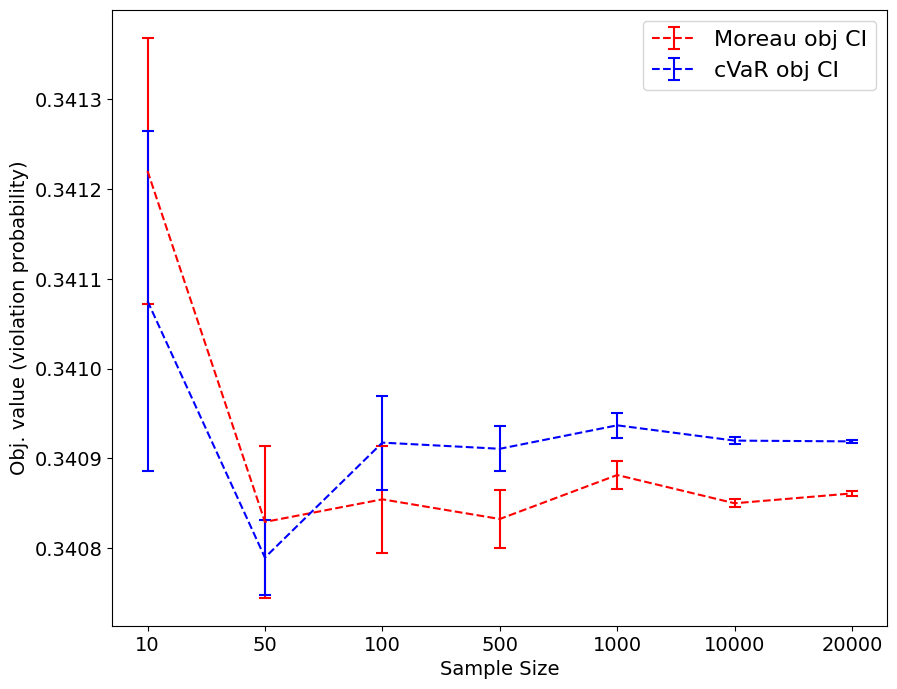

In [ ]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Sample Size', fontsize = 14)
ax.set_ylabel('Obj. value (violation probability)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], seq, yerr = ci, color="r", **linestyle)
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], cv_seq, yerr = cv_ci, color="b", **linestyle)
ax.legend(['Moreau obj CI','cVaR obj CI'], fontsize  = 16)
plt.savefig('/content/drive/My Drive/Project-blending/2mat1pro1qual.png')
plt.show()

## One quality measure, 7 materials 1 product

### cVAR obj

In [ ]:
#N_seq = [10, 50, 100]; # number of samples
N_seq = [10, 50, 100, 200, 500, 1000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.001;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2,3,4,5,6,7]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N)
        e2 = np.random.uniform(14.540,15.656, N)
        e3 = np.random.uniform(15.232,17.202,N)
        e4 = np.random.uniform(15.232,17.202,N)
        e5 = np.random.uniform(15.160,17.892,N)
        e6 = np.random.uniform(14.510,17.648,N)
        e7 = np.random.uniform(10.250,13.680,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB',e);
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))
          x[3,j] = LB_model.addVar(lb=0,ub=0.11,name="x(%s_%s)" % (3,j))
          x[4,j] = LB_model.addVar(lb=0,ub=0.27,name="x(%s_%s)" % (4,j))
          x[5,j] = LB_model.addVar(lb=0,ub=0.25,name="x(%s_%s)" % (5,j))
          x[6,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (6,j))
          x[7,j] = LB_model.addVar(lb=0,ub=0.099,name="x(%s_%s)" % (7,j))

        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = LB_model.addVar()
          LB_model.addConstr(t == e1[k]*x[1,k]+e2[k]*x[2,k]+e3[k]*x[3,k]+ e4[k]*x[4,k]+e5[k]*x[5,k]+e6[k]*x[6,k]+e7[k]*x[7,k]-5.75-eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t],0)
          ue = LB_model.addVar()
          LB_model.addConstr(ue == -u/eps)

          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k] + 47.89 * (x[3,k] + x[4,k] + x[5,k]) + 54.22 * x[6,k] + 48.99 * x[7,k]<= 120, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+x[2,k]+x[3,k]+x[4,k]+x[5,k]+x[6,k]+x[7,k]>= 0.3)

        ues = LB_model.getVars()
        LB_model.setObjective(grb.quicksum(ues) * 1/N, grb.GRB.MINIMIZE)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 9.107298248878237e-18, 3: 0.0, 4: 0.0, 5: 0.00298139630178883, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3388810495547983, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 5.117434254131581e-17, 3: 0.0, 4: 0.0007240964331399574, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.06855957950345824, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 5.551115123125783e-17, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3368925964578386, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 2.7755575615628914e-17, 2: 0

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: -1.6479873021779667e-17, 3: 0.0, 4: 0.0012561890268256572, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.22926050023322259, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: -5.551115123125783e-17, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3393273118081654, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: -3.469446951953614e-18, 3: 0.0, 4: 0.0, 5: 0.0029600677179093446, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.33255326132030544, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: -6.318188160

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.09014023046014992, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: -5.551115123125783e-17, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3322577663779489, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0838896093856572, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 5.637851296924623e-18, 3: 0.0, 4: 0.0019759794100374546, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.232181275921798, 2: 1.3877787807814457e-17, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: -1.024571052998801

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3334284600108485, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.23082326523380323, 2: -6.938893903907228e-17, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: -3.0791341698588326e-17, 3: 0.0, 4: 0.0019670216640647847, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08957845726368015, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.06884120797873862, 2: -5.551115123125783e-17, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33877495874445146, 2

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: -2.7755575615628914e-17, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.07519407249679744, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: -7.553501010434949e-17, 3: 0.0, 4: 4.532760508151437e-05, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: -4.7488055154865094e-17, 3: 0.0017107935895135673, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08507368161776252, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.06657480826299844, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.231641568547597

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.23210287259972168, 2: 4.163336342344337e-17, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08009775248934733, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 1.8539857149502126e-17, 3: 0.0, 4: 0.0006346240763940693, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08937640634005348, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 2.2768245622195593e-18, 3: 0.0, 4: 0.00020754709617713658, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.33928768895099004

#### CI plot

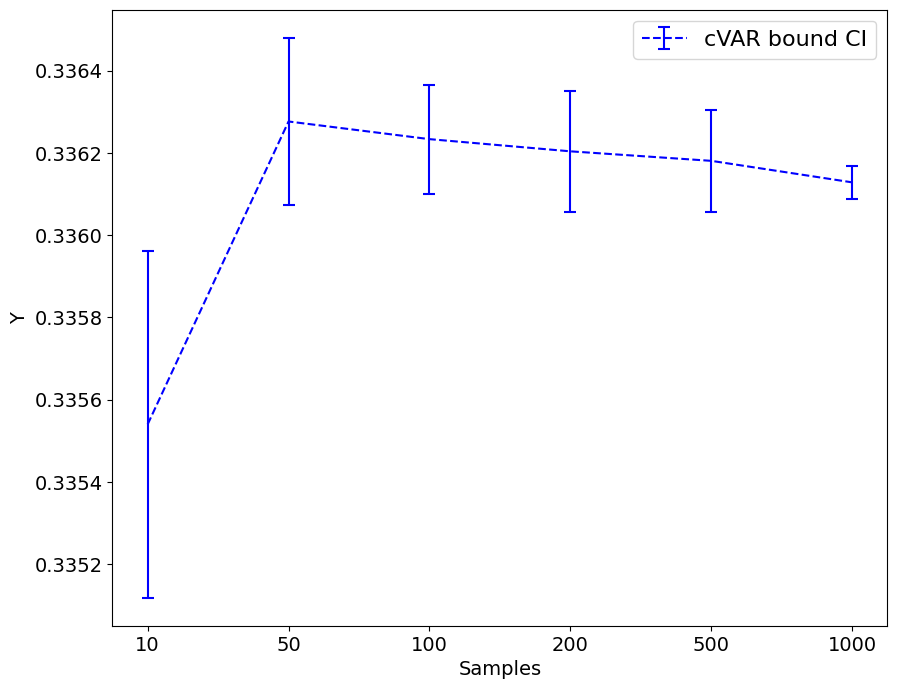

In [ ]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], LB_seq, yerr = LB_ci, color="b", **linestyle)
ax.legend(['cVAR bound CI'], fontsize  = 16)
plt.show()

## One quality measure, 7 materials, two products with different thermal requirement

### Moreau obj.

In [ ]:
#N_seq = [10, 50, 100, 500, 1000, 3000, 5000, 10000, 15000, 20000]; # numb of samples, it overshoot at 3000, not sure why though...
N_seq = [10, 50, 100, 500, 1000] # mu smaller is faster, as the function is getting smoother
M = 10; # numb of replication
alpha = 0.05;
# feasible region of Qx-b1 (first product's bound)
lb1 = 0
ub1 = 10.21
# feasible region of Qy-b2 (2nd product's bound)
lb2=0
ub2=24.03 
seq = np.zeros(len(N_seq));
me_seq = np.zeros(len(N_seq)); 
ci_up_seq = np.zeros(len(N_seq));
ci_low_seq = np.zeros(len(N_seq));
ci= np.zeros(len(N_seq));

x_id = [1,2, 3, 4, 5, 6, 7]
y_id = [1,2, 3, 4, 5, 6, 7]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    obj = np.zeros(M);
    #UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N)
        e2 = np.random.uniform(14.540,15.656, N)
        e3 = np.random.uniform(15.232,17.202,N)
        e4 = np.random.uniform(15.232,17.202,N)
        e5 = np.random.uniform(15.160,17.892,N)
        e6 = np.random.uniform(14.510,17.648,N)
        e7 = np.random.uniform(10.250,13.680,N)
        exp = 0; # each replication
        mu = 0.01 # control step size

        # model
        model = grb.Model('SAA_mor', env = e);
        model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        y = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = model.addVar(lb=0,name="x(%s_%s)" % (1,j))
          x[2,j] = model.addVar(lb=0,name="x(%s_%s)" % (2,j))
          x[3,j] = model.addVar(lb=0,name="x(%s_%s)" % (3,j))
          x[4,j] = model.addVar(lb=0,name="x(%s_%s)" % (4,j))
          x[5,j] = model.addVar(lb=0,name="x(%s_%s)" % (5,j))
          x[6,j] = model.addVar(lb=0,name="x(%s_%s)" % (6,j))
          x[7,j] = model.addVar(lb=0,name="x(%s_%s)" % (7,j))

          y[1,j] = model.addVar(lb=0,name="y(%s_%s)" % (1,j))
          y[2,j] = model.addVar(lb=0,name="y(%s_%s)" % (2,j))
          y[3,j] = model.addVar(lb=0,name="y(%s_%s)" % (3,j))
          y[4,j] = model.addVar(lb=0,name="y(%s_%s)" % (4,j))
          y[5,j] = model.addVar(lb=0,name="y(%s_%s)" % (5,j))
          y[6,j] = model.addVar(lb=0,name="y(%s_%s)" % (6,j))
          y[7,j] = model.addVar(lb=0,name="y(%s_%s)" % (7,j))


        model.update()

        # Define Objective & constraints
        for k in range(N):
          t1 = model.addVar()
          model.addConstr(t1 == e1[k]*x[1,k]+e2[k]*x[2,k]+e3[k]*x[3,k]+ e4[k]*x[4,k]+e5[k]*x[5,k]+e6[k]*x[6,k]+e7[k]*x[7,k]-5.75)
          t2 = model.addVar()
          model.addConstr(t2 == e1[k]*y[1,k]+e2[k]*y[2,k]+e3[k]*y[3,k]+ e4[k]*y[4,k]+e5[k]*y[5,k]+e6[k]*y[6,k]+e7[k]*y[7,k]-7.677)
          #max violation
          t = model.addVar() #max violation (compare t1, t2 with baseline, baseline should never be picked, baseline is the lowest Qx-b, this is set such that either t1 or t2 can be picked)
          model.addGenConstrMin(t,[t1,t2],24.03)

          ##Projection of Qx-b to [0,ub]: min{max{Qx-b,lb},ub}
          #max (Qx,lb+b) = u
          u = model.addVar()
          model.addGenConstrMax(u,[t],lb1) #lb1 and lb2 are the same


          #min (u, ub) = v
          v = model.addVar()
          model.addGenConstrMin(v,[u],ub1) # ub1 is smaller, projecting to the smaller region make it available for all

          ## minimize distance of current Qx-b to projection
          d = model.addVar()
          model.addConstr(d == ((t-v)**2)*mu/2)

          model.addConstr(69.97 * (x[1,k]+y[1,k]) + 56.80 * (x[2,k]+y[2,k]) + 47.89 * (x[3,k]+y[3,k] + x[4,k]+y[4,k] + x[5,k]+y[5,k]) + 54.22 * (x[6,k]+y[6,k]) + 48.99 * (x[7,k]+y[7,k])<= 150, name = "constr1(%s)"%k)
          model.addConstr(x[1,k]+y[1,k]+x[2,k]+y[2,k]+x[3,k]+y[3,k]+x[4,k]+y[4,k]+x[5,k]+y[5,k]+x[6,k]+y[6,k]+x[7,k]+y[7,k]>= 0.3)
          model.addConstr(x[1,k]+y[1,k]<=0.34)
          model.addConstr(x[2,k]+y[2,k]<=0.6)
          model.addConstr(x[3,k]+y[3,k]<=0.11)
          model.addConstr(x[4,k]+y[4,k]<=0.27)
          model.addConstr(x[5,k]+x[5,k]<=0.25)
          model.addConstr(x[6,k]+x[6,k]<=0.34)
          model.addConstr(x[7,k]+x[7,k]<=0.099)

        ds = model.getVars()
        model.setObjective(grb.quicksum(ds)*1.0/N, grb.GRB.MINIMIZE)

        model.setParam('NonConvex', 2)
        model.optimize()

        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = model.getAttr('x', x).values()[i];
        yval ={}
        for i,yv in enumerate(y_id):
            yval[yv] = model.getAttr('x', y).values()[i];

        exp = model.objVal;
        obj[rep_m] = exp;
        print(xval)
        print(yval)

    seq[s] = sum(obj)*1.0/M;
    print("Moreau Bound = ", seq[s]);
    var = sum([np.square(obj[k]-seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Moreau Bound Variance = ", var);
    # marginal error
    me = (stat.norm.ppf(1-alpha)*np.power(var,1/2))*1.0/(np.power(M,1)/2);
    ci[s] = me
    ci_up_seq[s]  = seq[s] + me;
    ci_low_seq[s] = seq[s] - me;
    print("CI of Moreau Bound = [", ci_low_seq[s]," , ", ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.2136678556723486, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.44961629658263746, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.14827040032120334, 5: 0.09573212968640708, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.1217295996787967, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.14558770268709634, 5: 0.10841375336916903, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.12441229731290368, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.05757765206533015, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.4463740368842329, 7: 0.0}
Academic licens

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.16647083522251407, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.44758949290253885, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.21372354323647733, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.4454995225007047, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.16400023355337634, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.4361942118503554, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.21328249718307218, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.4443749663675293, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - 

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.16751240817351612, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.44580529885669157, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.21023490026434086, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.43805442486433027, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.2204653771074517, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.11953462289254832, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.2355345887433034, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0905615757040582, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.01136868391199005, 6: 0.0, 7: 0.0}
Academic license - for non-com

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.16949478817085253, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.45183061010912356, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.05560567344070957, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.440709230612083, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.14907153776087817, 5: 0.10021517718431597, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.12092846223912182, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0016153757254277318, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.27, 5: 0.0680996391026856, 6: 0.0, 7: 0.0}
Academic license - for non-co

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.04450932478652895, 5: 0.125, 6: 0.17, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.44917876321517336, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.16965301170491, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.17, 7: 0.0}
{1: 0.17034698829509, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.2831477301386368, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.216252420565681, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.125, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.45283655320497973, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.2572212518025508, 5: 0.09753934374130539, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.012778748197449234, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - fo

#### CI plot

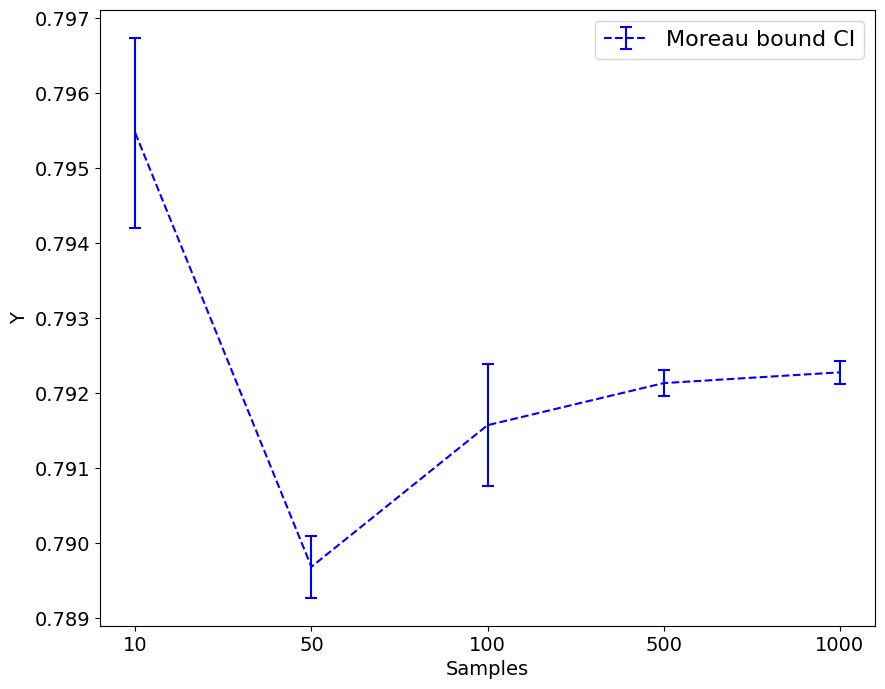

In [ ]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], seq, yerr = ci, color="b", **linestyle)
ax.legend(['Moreau bound CI'], fontsize  = 16)
plt.show()

### cVAR obj

In [ ]:
#N_seq = [10, 50, 100]; # number of samples
N_seq = [10, 50, 100, 500, 1000]; # numb of samples
M = 10; # numb of replication
Nprim = 1000;
alpha = 0.05;
eps = 0.001;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2,3,4,5,6,7]
y_id = [1,2,3,4,5,6,7]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1 = np.random.uniform(16.768,16.982,N)
        e2 = np.random.uniform(14.540,15.656, N)
        e3 = np.random.uniform(15.232,17.202,N)
        e4 = np.random.uniform(15.232,17.202,N)
        e5 = np.random.uniform(15.160,17.892,N)
        e6 = np.random.uniform(14.510,17.648,N)
        e7 = np.random.uniform(10.250,13.680,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB',e);
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        y = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))
          x[3,j] = LB_model.addVar(lb=0,ub=0.11,name="x(%s_%s)" % (3,j))
          x[4,j] = LB_model.addVar(lb=0,ub=0.27,name="x(%s_%s)" % (4,j))
          x[5,j] = LB_model.addVar(lb=0,ub=0.25,name="x(%s_%s)" % (5,j))
          x[6,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (6,j))
          x[7,j] = LB_model.addVar(lb=0,ub=0.099,name="x(%s_%s)" % (7,j))

          y[1,j] = LB_model.addVar(lb=0,ub=0.34,name="y(%s_%s)" % (1,j))
          y[2,j] = LB_model.addVar(lb=0,ub=0.60,name="y(%s_%s)" % (2,j))
          y[3,j] = LB_model.addVar(lb=0,ub=0.11,name="y(%s_%s)" % (3,j))
          y[4,j] = LB_model.addVar(lb=0,ub=0.27,name="y(%s_%s)" % (4,j))
          y[5,j] = LB_model.addVar(lb=0,ub=0.25,name="y(%s_%s)" % (5,j))
          y[6,j] = LB_model.addVar(lb=0,ub=0.34,name="y(%s_%s)" % (6,j))
          y[7,j] = LB_model.addVar(lb=0,ub=0.099,name="y(%s_%s)" % (7,j))

        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t1 = LB_model.addVar()
          LB_model.addConstr(t1 == e1[k]*x[1,k]+e2[k]*x[2,k]+e3[k]*x[3,k]+ e4[k]*x[4,k]+e5[k]*x[5,k]+e6[k]*x[6,k]+e7[k]*x[7,k]-5.75-eps)
          t2 = LB_model.addVar()
          LB_model.addConstr(t1 == e1[k]*y[1,k]+e2[k]*y[2,k]+e3[k]*y[3,k]+ e4[k]*y[4,k]+e5[k]*y[5,k]+e6[k]*y[6,k]+e7[k]*y[7,k]-7.677-eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t1,t2],0)
          ue = LB_model.addVar()
          LB_model.addConstr(ue == -u/eps)

          LB_model.addConstr(69.97 * (x[1,k]+y[1,k]) + 56.80 * (x[2,k]+y[2,k]) + 47.89 * (x[3,k]+y[3,k] + x[4,k]+y[4,k] + x[5,k]+y[5,k]) + 54.22 * (x[6,k]+y[6,k]) + 48.99 * (x[7,k]+y[7,k])<= 120, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+y[1,k]+x[2,k]+y[2,k]+x[3,k]+y[3,k]+x[4,k]+y[4,k]+x[5,k]+y[5,k]+x[6,k]+y[6,k]+x[7,k]+y[7,k]>= 0.3)

        ues = LB_model.getVars()
        LB_model.setObjective(grb.quicksum(ues) * 1/N, grb.GRB.MINIMIZE)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];

        yval ={}
        for i,yv in enumerate(y_id):
            yval[yv] = LB_model.getAttr('x', y).values()[i];

        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)
        print(yval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.339001636944455, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.112692442759299, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.23085204047057278, 6: 0.0, 7: 0.0}
{1: 0.09548745283632588, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0021507217165577792, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.00920422530694081, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.22858409942308408, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.0021965026762880845, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use 

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.07846628799066586, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.19317512568473352, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.07674340458714704, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.19157912049443226, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0671201519720445, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.18133593666115716, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3376689838142043, 7: 0.0}
{1: 0.11121605455341221, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.34, 7: 0.0}
Academic license - for non-commercial use only 

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3374782124403368, 7: 0.0}
{1: 0.111516306454808, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.34, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.09156981930177158, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.20620184259207108, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0766640496892714, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.0809546115078507, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3389257946174696, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.11311517143848326, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - re

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.3275246426559598, 7: 0.0}
{1: 0.10166010286442598, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.34, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.06987890593045874, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.18427204282569087, 2: 0.0, 3: 0.0, 4: 0.27, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.0004096831750874472, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.11844563777616256, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.34, 2: 0.0, 3: 0.003002660609672629, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.11, 4: 0.010453190864968357, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use

  0%|          | 0/10 [00:00<?, ?it/s]

Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0873090993639979, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.11, 4: 0.0, 5: 0.25, 6: 0.09047899562859062, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.3392378614570519, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0}
{1: 0.34, 2: 0.0, 3: 0.0, 4: 0.11325390948792632, 5: 0.0, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.08536986323458572, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.19833326814575913, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only - registered to hannah.wang.sw2285@yale.edu
{1: 0.08237435051439398, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
{1: 0.19698422435452548, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.25, 6: 0.0, 7: 0.0}
Academic license - for non-commercial use only

### CI plot

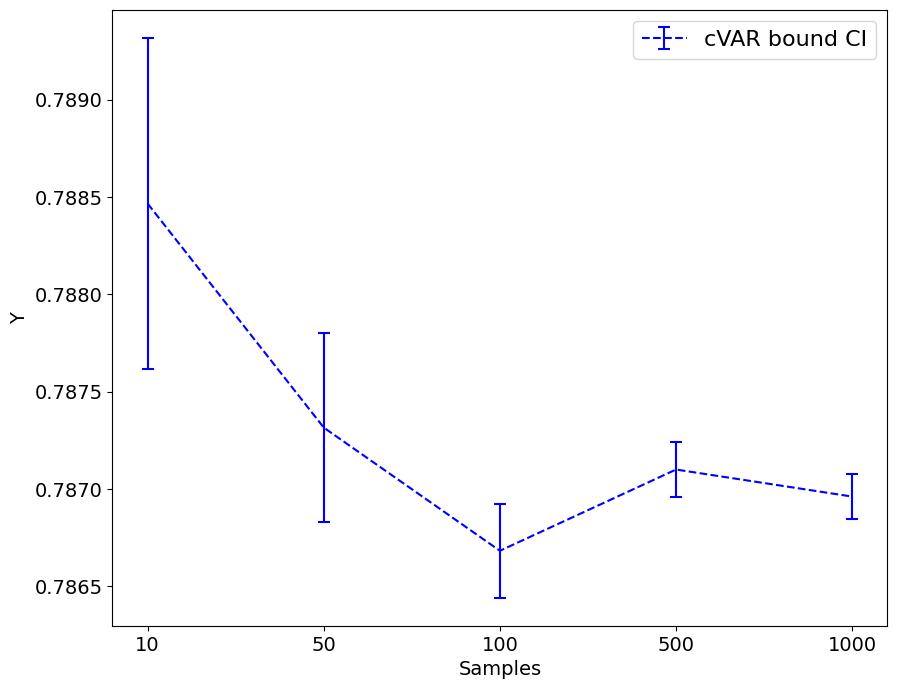

In [ ]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Samples', fontsize = 14)
ax.set_ylabel('Y', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], LB_seq, yerr = LB_ci, color="b", **linestyle)
ax.legend(['cVAR bound CI'], fontsize  = 16)
plt.show()

#### CI of both

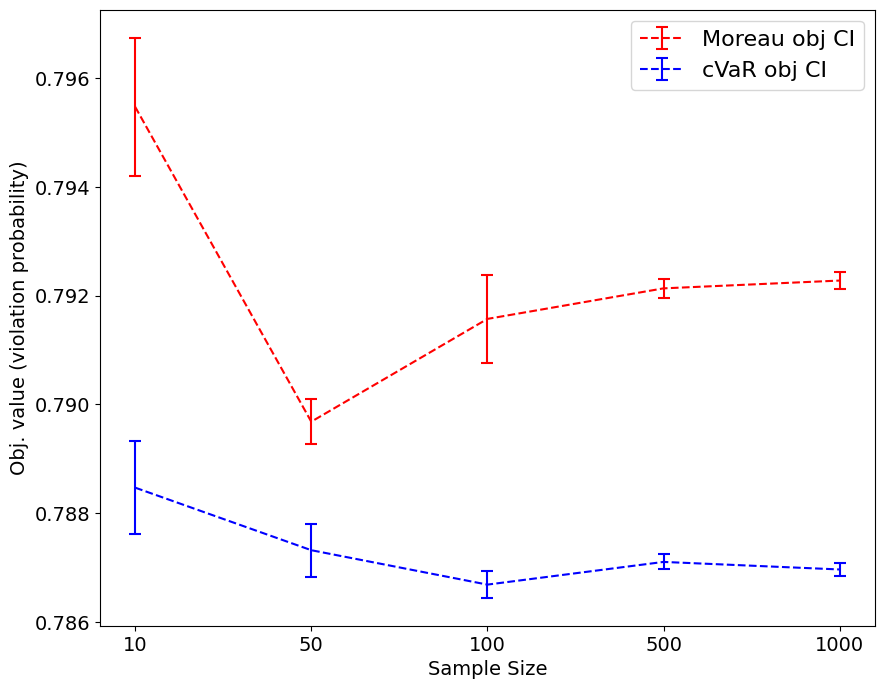

In [ ]:
fig =  plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.set_xlabel('Sample Size', fontsize = 14)
ax.set_ylabel('Obj. value (violation probability)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
# ax.axis([0, 5, 0, 35])
linestyle = {"linestyle":"--", "linewidth":1.5, "markeredgewidth":1.5, "elinewidth":1.5, "capsize":4}
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], seq, yerr = ci, color="r", **linestyle)
ax.errorbar([str(N_seq[i]) for i in range(len(N_seq))], LB_seq, yerr = LB_ci, color="b", **linestyle)
ax.legend(['Moreau obj CI','cVaR obj CI'], fontsize  = 16)
plt.savefig('/content/drive/My Drive/Project-blending/2mat1pro2qual.png')
plt.show()

### ash content, thermal content
easily exceed free-licence limit if use cvaR obj.

In [ ]:
N_seq = [10, 20, 30]; # number of samples
#N_seq = [10 50 100 200 500 1000]; # numb of samples
M = 10; # numb of replication
alpha = 0.05;
eps = 0.01;

LB_seq = np.zeros(len(N_seq));
LB_me_seq = np.zeros(len(N_seq)); 
LB_ci_up_seq = np.zeros(len(N_seq));
LB_ci_low_seq = np.zeros(len(N_seq));
LB_ci= np.zeros(len(N_seq));

x_id = [1,2]
for s in range(len(N_seq)):
    N = N_seq[s];
    print("######################## Sample size (", N, ") ########################");
    LB_obj = np.zeros(M);
    UB_obj = np.zeros(M);
    
    # M replication experiments
    for rep_m in trange(M):
        # lower bound ###############################################################################
        # N independent parameter samples
        e1t = np.random.uniform(16.768,16.982,N)
        e2t = np.random.uniform(14.540,15.656, N)
        e1a = np.random.uniform(0.30,0.75,N)
        e2a = np.random.uniform(0.1,1.13,N)
        LB_exp = 0; # each replication
        
        # model
        LB_model = grb.Model('SAA_LB');
        LB_model.setParam('OutputFlag', 0)
        
        # variables
        x = {}
        # for k in x_id:
        for j in range(N):
          x[1,j] = LB_model.addVar(lb=0,ub=0.34,name="x(%s_%s)" % (1,j))
          x[2,j] = LB_model.addVar(lb=0,ub=0.60,name="x(%s_%s)" % (2,j))


        LB_model.update()

        # Define Objective & constraints
        for k in range(N):
          t = LB_model.addVar()
          a = LB_model.addVar()
          LB_model.addConstr(t == e1t[k]*x[1,k]+e2t[k]*x[2,k]-5.75+eps)
          LB_model.addConstr(a== (1-e1a[k])*x[1,k]+(1-e2a[k])*x[2,k] + eps)

          #max
          u = LB_model.addVar()
          LB_model.addGenConstrMax(u,[t],0)
          ue = LB_model.addVar()
          LB_model.addConstr(ue == u/eps)
          v = LB_model.addVar()
          LB_model.addGenConstrMax(v,[a],0)
          ve = LB_model.addVar()
          LB_model.addConstr(ve == v/eps)

          LB_model.addConstr(69.97 * x[1,k] + 56.80 * x[2,k]<= 50, name = "constr1(%s)"%k)
          LB_model.addConstr(x[1,k]+x[2,k]>= 0.3)

        ues = LB_model.getVars()
        ves = LB_model.getVars()
        LB_model.setObjective(grb.quicksum( ues + ves)*1.0/N, grb.GRB.MAXIMIZE)
        LB_model.setParam('NonConvex', 2)

        LB_model.optimize()
        xval ={}
        for i,xv in enumerate(x_id):
            xval[xv] = LB_model.getAttr('x', x).values()[i];
        LB_exp = LB_model.objVal;
        LB_obj[rep_m] = LB_exp;
        print(xval)

    LB_seq[s] = sum(LB_obj)*1.0/M;
    print("Lower Bound = ", LB_seq[s]);
    LB_var = sum([np.square(LB_obj[k]-LB_seq[s]) for k in range(M)]) *1.0/(M-1);
    print("Lower Bound Variance = ", LB_var);
    # marginal error
    LB_me = (stat.norm.ppf(1-alpha)*np.power(LB_var,1/2))*1.0/(np.power(M,1)/2);
    LB_ci[s] = LB_me
    LB_ci_up_seq[s]  = LB_seq[s] + LB_me;
    LB_ci_low_seq[s] = LB_seq[s] - LB_me;
    print("CI of Lower Bound = [", LB_ci_low_seq[s]," , ", LB_ci_up_seq[s],"]");


######################## Sample size ( 10 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

Restricted license - for non-production use only - expires 2023-10-25
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
Lower Bound =  1.6550521652136632
Lower Bound Variance =  0.0
CI of Lower Bound = [ 1.6550521652136632  ,  1.6550521652136632 ]
######################## Sample size ( 20 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
{1: 0.22752608260683152, 2: 0.6}
Lower Bound =  1.6550521652136632
Lower Bound Variance =  0.0
CI of Lower Bound = [ 1.6550521652136632  ,  1.6550521652136632 ]
######################## Sample size ( 30 ) ########################


  0%|          | 0/10 [00:00<?, ?it/s]

{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
{1: 0.22752608260683155, 2: 0.6}
Lower Bound =  1.6550521652136632
Lower Bound Variance =  0.0
CI of Lower Bound = [ 1.6550521652136632  ,  1.6550521652136632 ]
